### Step 1: Load the Iris Dataset

In [41]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)

We selected two features from the Iris dataset:

- Sepal Length
- Sepal Width
<br>These are used for plotting the decision boundary.

### Step 2: Calculate Euclidean Distance

In [25]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

### Step 3: KNN Algorithm

In [59]:
def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []

        # Calculate distance from test point to each training point
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        
        # Sort distances and select k nearest neighbors
        distances = sorted(distances)[:k]
        neighbors = [neighbor[1] for neighbor in distances]
        
        # Majority Voting
        prediction = max(set(neighbors), key=neighbors.count)
        predictions.append(prediction)
        
    return np.array(predictions)

#### How it Works:
- Loop through each test point.
- Calculate distance between the test point and each training point.
- Store distances with corresponding labels.
- Sort the distances.
- Select k nearest neighbors.
- Assign the most common label (majority vote) as the predicted class.

### Step 4: Run KNN with k=3

In [45]:
k = 4
y_pred = knn(X_train, y_train, X_test, k)

### Step 5: Compare Actual vs Predicted

In [47]:
print("Actual:   ", y_test)
print("Predicted:", y_pred)

Actual:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted: [1 0 2 1 1 0 1 1 1 2 2 0 0 0 0 2 1 1 1 1 0 1 0 1 2 1 1 2 0 0]


### Step 6: Decision Boundary Plot

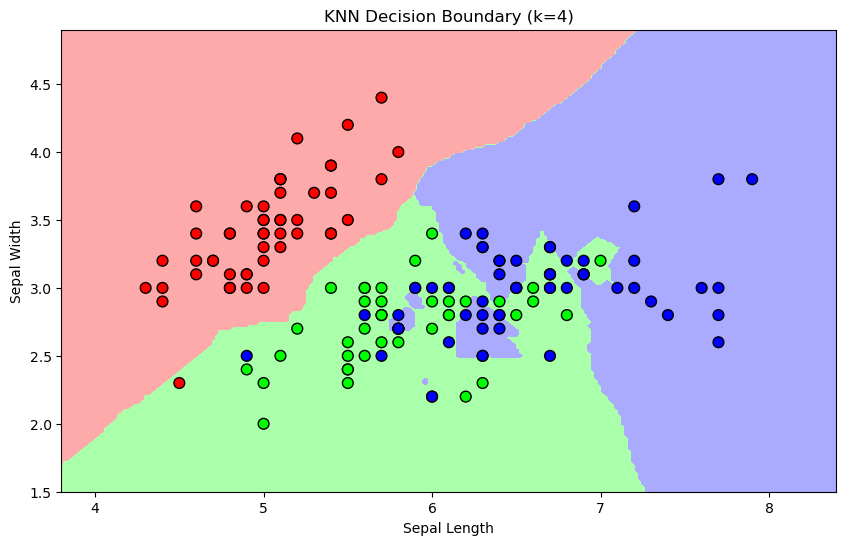

In [49]:
def plot_decision_boundary(X, y, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=60)
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

plot_decision_boundary(X, y, k)